<a href="https://colab.research.google.com/github/vdoddihithlu/MLModels/blob/main/Laptop_Price_Analysis_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import kagglehub

path = kagglehub.dataset_download("sadiajavedd/brand-wise-laptop-price-dataset")
print("Path to dataset files:", path)
files_in_path = os.listdir(path)
print(f"Files in path: {files_in_path}")

100%|██████████| 25.2k/25.2k [00:00<00:00, 33.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sadiajavedd/brand-wise-laptop-price-dataset/versions/1
Files in path: ['laptop_prices (1).csv']


In [5]:
csv_file_path = os.path.join(path, 'laptop_prices (1).csv')
df = pd.read_csv(csv_file_path)

In [6]:
df.sample(5)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
1074,Lenovo,ThinkPad Yoga,Ultrabook,12.5,8,Windows 10,1.30,1713.49,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,256,0,SSD,No,Intel,HD Graphics 520
1071,HP,ProBook 650,Notebook,15.6,4,Windows 10,2.31,1199.00,Standard,1366,...,No,Intel,2.3,Core i5 6200U,500,0,HDD,No,Intel,HD Graphics 520
739,Acer,Aspire ES1-572,Notebook,15.6,4,Windows 10,2.40,410.80,Standard,1366,...,No,Intel,2.0,Core i3 6006U,500,0,HDD,No,Intel,HD Graphics 520
271,Asus,Rog Strix,Gaming,17.3,16,Windows 10,3.20,1549.00,Full HD,1920,...,No,AMD,3.0,Ryzen 1700,256,1024,SSD,HDD,AMD,Radeon RX 580
816,Razer,Blade Stealth,Ultrabook,12.5,16,Windows 10,1.29,1799.00,4K Ultra HD,3840,...,No,Intel,2.5,Core i7 7500U,512,0,SSD,No,Intel,HD Graphics 620


**EDA**

In [7]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [8]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [9]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company,1275,19,Dell,291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,1275,618,XPS 13,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TypeName,1275,6,Notebook,707,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inches,1275.0,NaN,NaN,NaN,15.022902,1.42947,10.1,14.0,15.6,15.6,18.4
Ram,1275.0,NaN,NaN,NaN,8.440784,5.097809,2.0,4.0,8.0,8.0,64.0
OS,1275,9,Windows 10,1048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,1275.0,NaN,NaN,NaN,2.040525,0.669196,0.69,1.5,2.04,2.31,4.7
Price_euros,1275.0,NaN,NaN,NaN,1134.969059,700.752504,174.0,609.0,989.0,1496.5,6099.0
Screen,1275,4,Full HD,835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ScreenW,1275.0,NaN,NaN,NaN,1900.043922,493.346186,1366.0,1920.0,1920.0,1920.0,3840.0


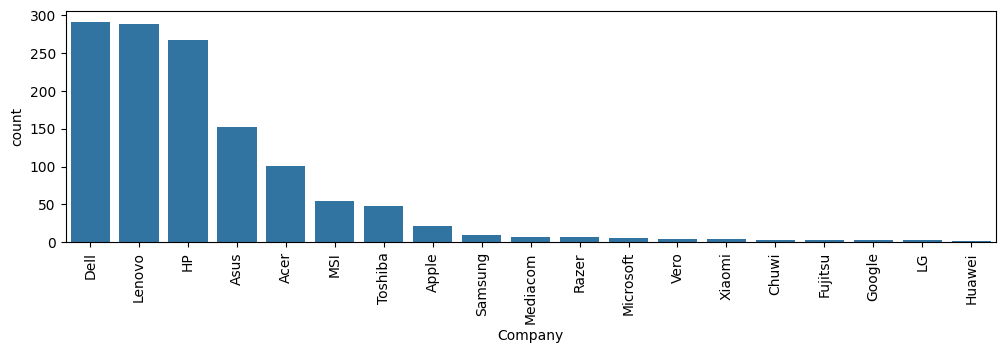

In [10]:
plt.figure(figsize=(12, 3))
sns.countplot(x='Company', data=df ,order=df['Company'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

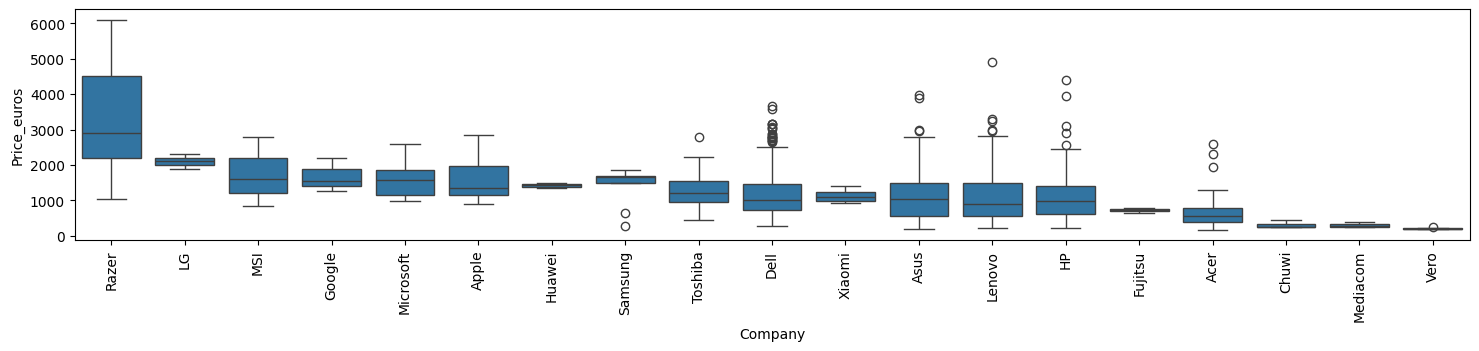

In [11]:
plt.figure(figsize=(18, 3))
ord=df.groupby('Company')['Price_euros'].mean().sort_values(ascending=False).index
sns.boxplot(x='Company', y='Price_euros', data=df, order=ord)
plt.xticks(rotation=90)
plt.show()

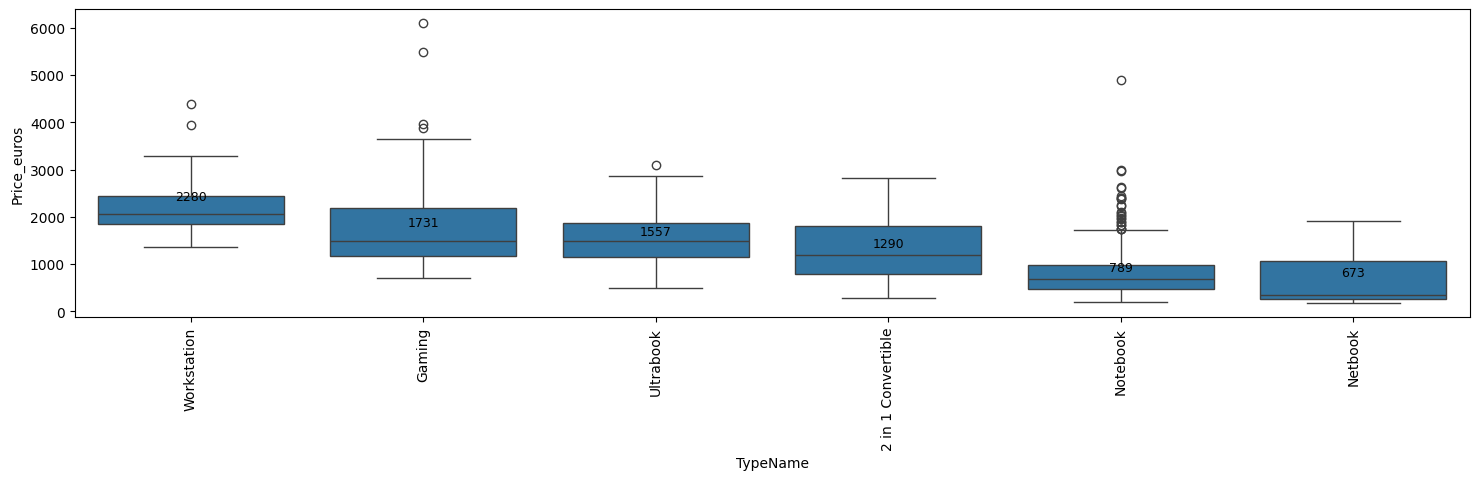

In [12]:
plt.figure(figsize=(18, 4))
ord=df.groupby('TypeName')['Price_euros'].mean().sort_values(ascending=False).index
sns.boxplot(x='TypeName', y='Price_euros', data=df, order=ord)

# Calculate mean prices for annotation
mean_prices = df.groupby('TypeName')['Price_euros'].mean().loc[ord]

# Add text annotations for mean prices
for i, company in enumerate(ord):
    plt.text(i, mean_prices.loc[company], f'{mean_prices.loc[company]:.0f}',
             ha='center', va='bottom', color='black', fontsize=9)

plt.xticks(rotation=90)
plt.show()

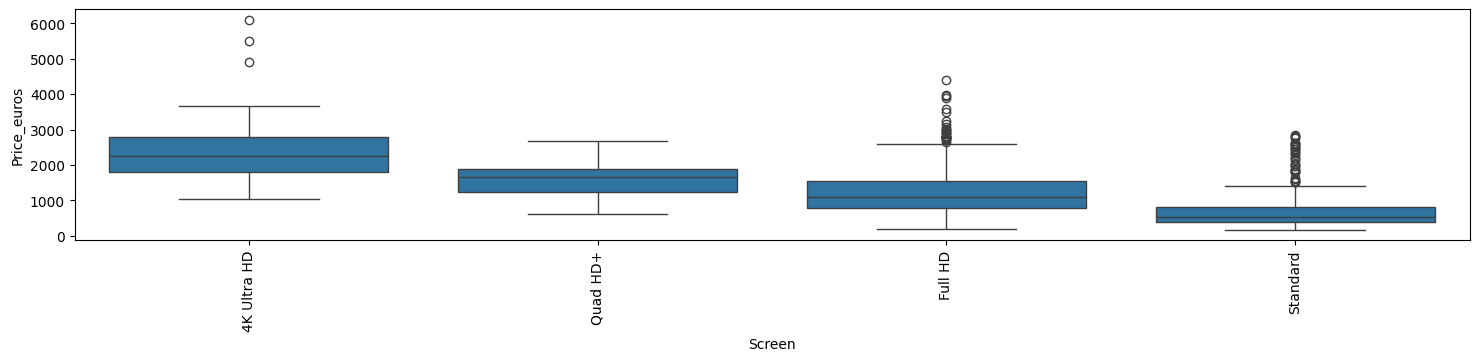

In [13]:
plt.figure(figsize=(18, 3))
ord=df.groupby('Screen')['Price_euros'].mean().sort_values(ascending=False).index
sns.boxplot(x='Screen', y='Price_euros', data=df, order=ord)
plt.xticks(rotation=90)
plt.show()

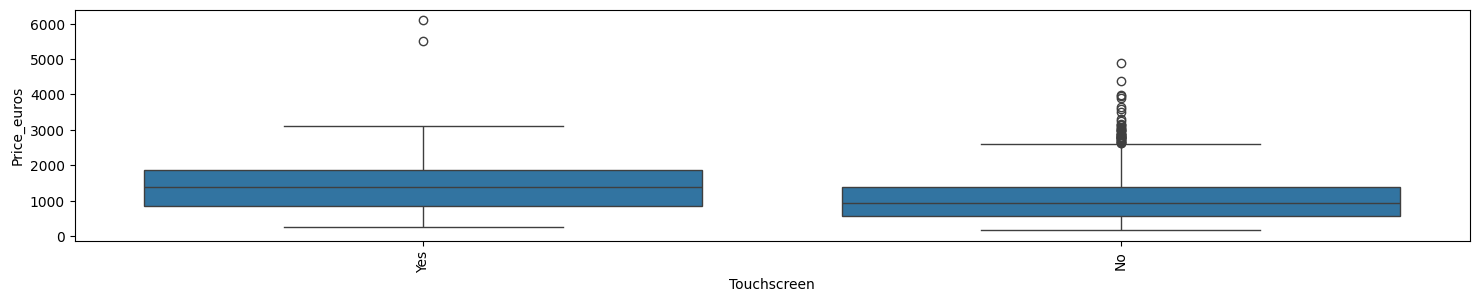

In [14]:
plt.figure(figsize=(18, 3))
ord=df.groupby('Touchscreen')['Price_euros'].mean().sort_values(ascending=False).index
sns.boxplot(x='Touchscreen', y='Price_euros', data=df, order=ord)
plt.xticks(rotation=90)
plt.show()

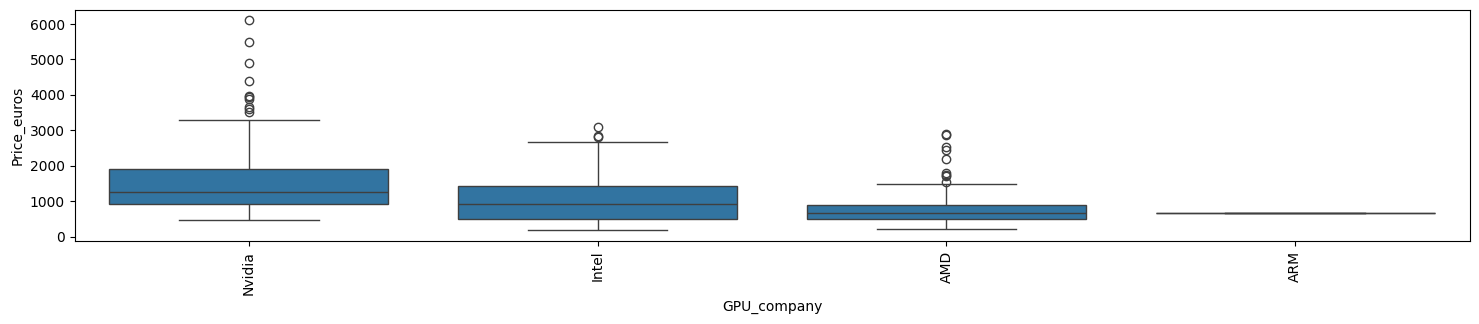

In [15]:
plt.figure(figsize=(18, 3))
ord=df.groupby('GPU_company')['Price_euros'].mean().sort_values(ascending=False).index
sns.boxplot(x='GPU_company', y='Price_euros', data=df, order=ord)
plt.xticks(rotation=90)
plt.show()

In [16]:
df.groupby('PrimaryStorageType')[['PrimaryStorage','Price_euros']].agg(['mean', 'min', 'max'])

PrimaryStorage             Price_euros                 
                             mean  min   max         mean     min      max
PrimaryStorageType                                                        
Flash Storage           80.901408   16   512   544.994648  191.90  2139.97
HDD                    883.387187   32  2048   658.401226  224.00  2899.00
Hybrid                 959.500000  508  1024   875.935000  549.99  1099.00
SSD                    282.203106    8  1024  1391.896547  174.00  6099.00

In [17]:
df.groupby('SecondaryStorageType')[['SecondaryStorage','Price_euros']].agg(['mean', 'min', 'max'])


SecondaryStorage              Price_euros           \
                                 mean   min   max         mean      min   
SecondaryStorageType                                                      
HDD                       1094.851485   500  2048  1610.424455   499.00   
Hybrid                    1024.000000  1024  1024  2994.995000  2749.99   
No                           0.000000     0     0  1040.399119   174.00   
SSD                        320.000000   256   512  1420.990000  1279.00   

                               
                          max  
SecondaryStorageType           
HDD                   3890.00  
Hybrid                3240.00  
No                    6099.00  
SSD                   1607.96

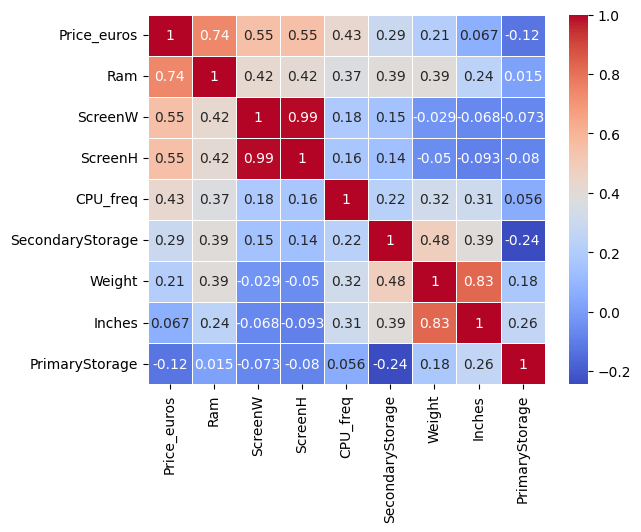

In [18]:
corr_matrix = df.select_dtypes(include=np.number).corr()
sorted_order = corr_matrix['Price_euros'].sort_values(ascending=False).index
sns.heatmap(corr_matrix.loc[sorted_order, sorted_order], cmap='coolwarm', annot=True, linewidths=0.5)
plt.show()

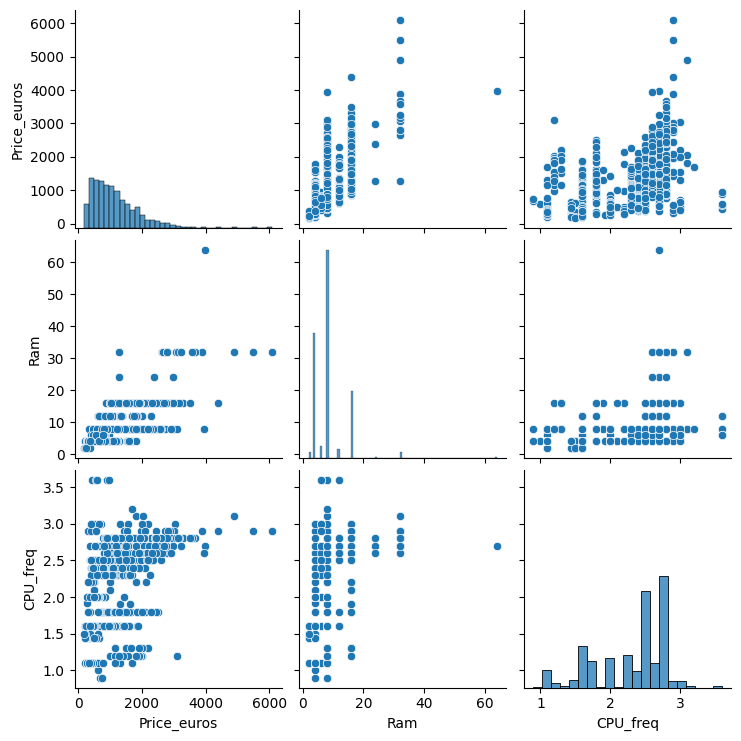

In [19]:
sns.pairplot(df[['Price_euros','Ram','CPU_freq']])

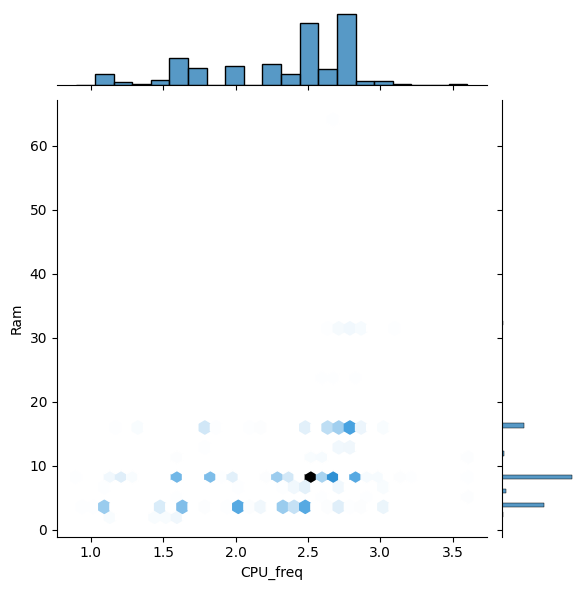

In [20]:
sns.jointplot(x='CPU_freq', y='Ram', data=df, kind='hex')
plt.show()

<Axes: xlabel='Price_euros', ylabel='Ram'>

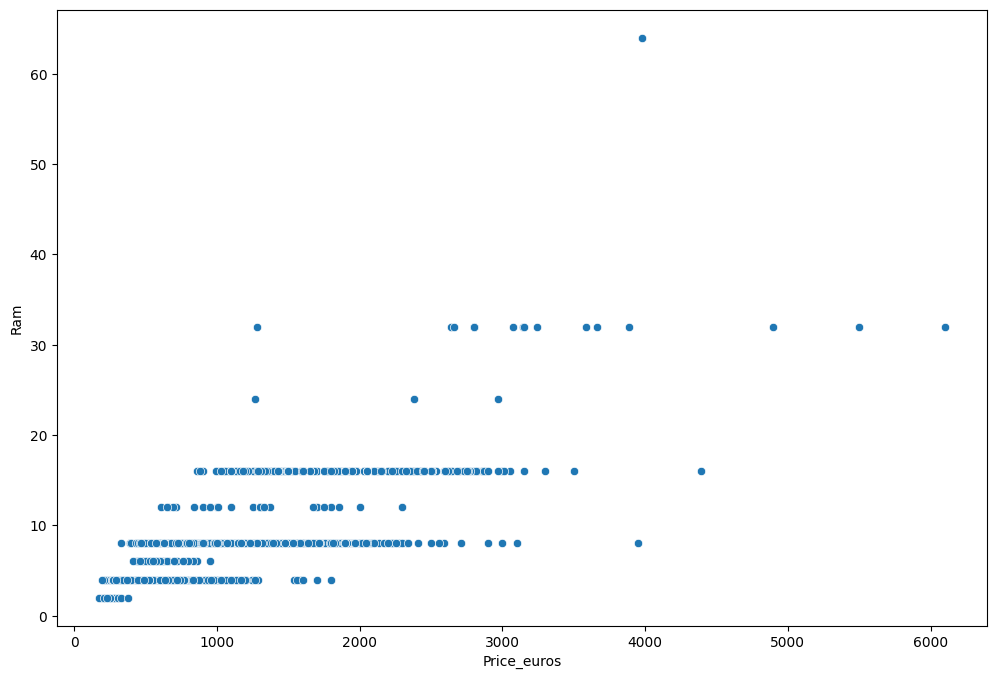

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Price_euros',y='Ram',data=df)

**Data Preparation**

In [22]:
df2 = df[['Company',  'Inches', 'Ram', 'Weight',
       'Price_euros', 'Screen', 'Touchscreen',
        'RetinaDisplay', 'CPU_company', 'CPU_freq',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company']]
       #'Product', 'TypeName',, 'OS', 'ScreenW', 'ScreenH' 'IPSpanel','CPU_model',, 'GPU_model'

In [23]:
df2.sample(3)

,Company,Inches,Ram,Weight,Price_euros,Screen,Touchscreen,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company
618,MSI,15.6,16,2.94,2267.86,Full HD,No,No,Intel,2.8,256,1024,SSD,HDD,Nvidia
1066,Asus,17.3,64,3.58,3975.00,Full HD,No,No,Intel,2.7,1024,0,SSD,No,Nvidia
195,HP,17.3,8,2.50,914.00,Full HD,No,No,Intel,1.6,1024,0,HDD,No,Nvidia


In [24]:
# Create dummy variables for PrimaryStorageType, and store storage size.
df_processed = df2.copy()
Primary_storage_type_dummies = pd.get_dummies(df_processed['PrimaryStorageType'], prefix='PrimaryStorage')
for col in Primary_storage_type_dummies.columns:
    df_processed[col] = Primary_storage_type_dummies[col] * df_processed['PrimaryStorage']

# Create dummy variables for PrimaryStorageType, and store storage size.
Secondary_storage_type_dummies = pd.get_dummies(df_processed['SecondaryStorageType'], prefix='SecondaryStorage')
for col in Secondary_storage_type_dummies.columns:
    df_processed[col] = Secondary_storage_type_dummies[col] * df_processed['SecondaryStorage']

#df_processed = df_processed.drop(columns=['PrimaryStorage', 'PrimaryStorageType','SecondaryStorage','SecondaryStorageType','SecondaryStorage_No'])

In [25]:
#df_processed.iloc[:,10:].sample(3)
#df_processed[df_processed['SecondaryStorageType'] != 'No'].iloc[:,10:].sample(3)
df_processed.sample(3)

,Company,Inches,Ram,Weight,Price_euros,Screen,Touchscreen,RetinaDisplay,CPU_company,CPU_freq,...,SecondaryStorageType,GPU_company,PrimaryStorage_Flash Storage,PrimaryStorage_HDD,PrimaryStorage_Hybrid,PrimaryStorage_SSD,SecondaryStorage_HDD,SecondaryStorage_Hybrid,SecondaryStorage_No,SecondaryStorage_SSD
441,Dell,15.6,4,2.2,749.00,Full HD,No,No,Intel,1.6,...,No,AMD,0,0,0,256,0,0,0,0
193,Lenovo,17.3,8,2.8,698.00,Standard,No,No,Intel,1.6,...,No,Nvidia,0,0,0,256,0,0,0,0
551,Dell,15.6,8,1.9,1116.99,Full HD,No,No,Intel,2.5,...,No,Intel,0,0,0,256,0,0,0,0


In [26]:
df_processed = df_processed.drop(columns=['PrimaryStorage', 'PrimaryStorageType','SecondaryStorage','SecondaryStorageType','SecondaryStorage_No'])

In [27]:
df_processed['RetinaDisplay'] = df_processed['RetinaDisplay'].map({'Yes': True, 'No': False})
df_processed['Touchscreen'] = df_processed['Touchscreen'].map({'Yes': True, 'No': False})
df3 = pd.get_dummies(df_processed, columns=['Company','Screen','CPU_company','GPU_company'], drop_first=True)

In [28]:
df3.head()

,Inches,Ram,Weight,Price_euros,Touchscreen,RetinaDisplay,CPU_freq,PrimaryStorage_Flash Storage,PrimaryStorage_HDD,PrimaryStorage_Hybrid,...,Company_Vero,Company_Xiaomi,Screen_Full HD,Screen_Quad HD+,Screen_Standard,CPU_company_Intel,CPU_company_Samsung,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,13.3,8,1.37,1339.69,False,True,2.3,0,0,0,...,False,False,False,False,True,True,False,False,True,False
1,13.3,8,1.34,898.94,False,False,1.8,128,0,0,...,False,False,False,False,True,True,False,False,True,False
2,15.6,8,1.86,575.00,False,False,2.5,0,0,0,...,False,False,True,False,False,True,False,False,True,False
3,15.4,16,1.83,2537.45,False,True,2.7,0,0,0,...,False,False,False,False,True,True,False,False,False,False
4,13.3,8,1.37,1803.60,False,True,3.1,0,0,0,...,False,False,False,False,True,True,False,False,True,False


**Model**

In [69]:
from sklearn.model_selection import train_test_split
X = df3.drop(columns=['Price_euros'])
y = df3['Price_euros']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [31]:
X_train_sc.shape, X_test_sc.shape, y_train.shape, y_test.shape

((1020, 39), (255, 39), (1020,), (255,))

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [33]:
model = Sequential()

model.add(Dense (39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense (20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense (10, activation='relu'))
model.add(Dense (1))

model.compile(optimizer='rmsprop', loss='mse')

# For a multi-class classification problem
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

In [34]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [35]:
model.fit(x=X_train_sc, y=y_train.values
          , validation_data=(X_test_sc, y_test.values)
          ,callbacks=[early_stop]
          , epochs=500)

Epoch 1/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1730286.5000 - val_loss: 1869957.5000
Epoch 2/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1788486.3750 - val_loss: 1858125.8750
Epoch 3/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1759420.5000 - val_loss: 1835624.7500
Epoch 4/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1627551.0000 - val_loss: 1797810.0000
Epoch 5/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1654299.7500 - val_loss: 1738796.1250
Epoch 6/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1811710.0000 - val_loss: 1649416.0000
Epoch 7/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1530184.2500 - val_loss: 1523190.2500
Epoch 8/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1472177.5000 - val_loss: 1364987.5000
Epoch 9/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1163085.6250 - val_loss: 1169169.7500
Epoch 10/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1012159.8125 - val_loss: 954608.9375
Epoch 11/500
32/32 ━━━━━━━━━━━

<Axes: >

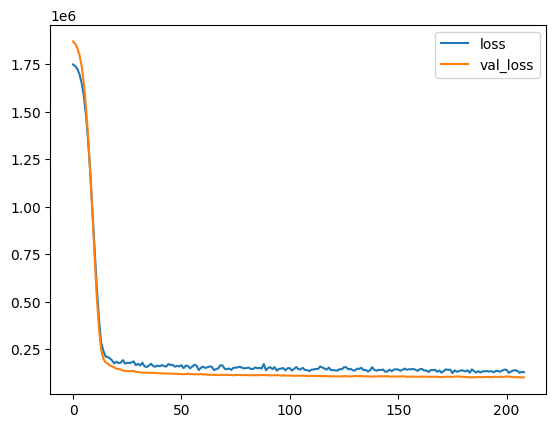

In [36]:
losses = pd.DataFrame(model.history.history)
losses.plot()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


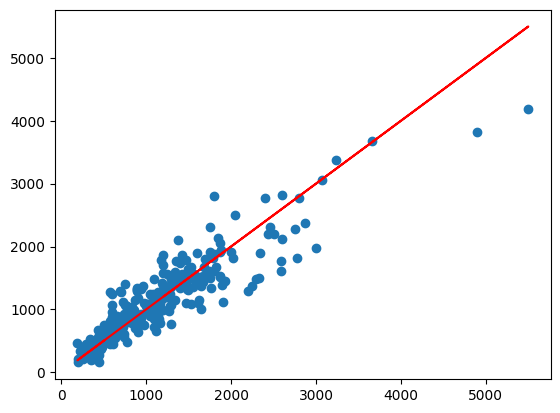

In [37]:
predictions = model.predict(X_test)
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score
print(mean_absolute_error(predictions,y_test))
print(np.sqrt(mean_squared_error(predictions,y_test)))
print(explained_variance_score(predictions,y_test))

222.74460584453504
319.5185573810273
0.7693087214647171


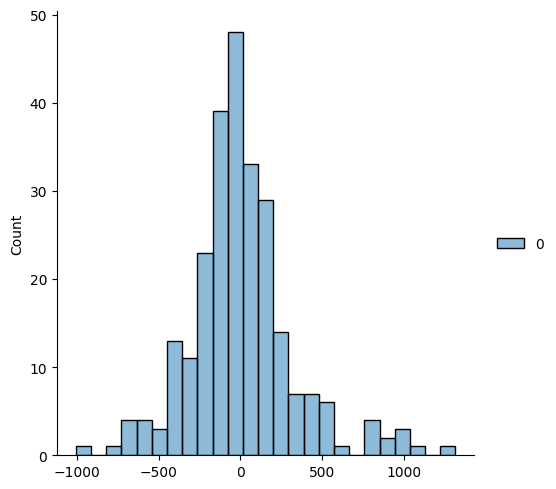

In [39]:
y_test.shape
errors = y_test.values.reshape(255, 1) - predictions
sns.displot(errors)

New Prediction

In [41]:
from tensorflow.keras.models import load_model
model.save('my_model.keras')

In [42]:
model2=load_model('my_model.keras')

In [88]:
import random
#random.seed(103)
random_ind = random.randint(0,len(X_test))
random_ind

print(X_test.iloc[random_ind])
#print(scaler.inverse_transform(X_test[random_ind].reshape(1, -1)))
print('Actual Price -', y_test.iloc[random_ind])

scl_data=scaler.transform(X_test.iloc[random_ind].values.reshape(1, -1))
print('Prediction -', model2.predict(scl_data.reshape(1,39)))


Inches                           14.0
Ram                                 8
Weight                            2.0
Touchscreen                     False
RetinaDisplay                   False
CPU_freq                          2.5
PrimaryStorage_Flash Storage        0
PrimaryStorage_HDD                  0
PrimaryStorage_Hybrid               0
PrimaryStorage_SSD                256
SecondaryStorage_HDD                0
SecondaryStorage_Hybrid             0
SecondaryStorage_SSD                0
Company_Apple                   False
Company_Asus                     True
Company_Chuwi                   False
Company_Dell                    False
Company_Fujitsu                 False
Company_Google                  False
Company_HP                      False
Company_Huawei                  False
Company_LG                      False
Company_Lenovo                  False
Company_MSI                     False
Company_Mediacom                False
Company_Microsoft               False
Company_Raze

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction - [[868.6024]]
